 #  <p style="text-align: center;">AllLife Credit Card Customer Segmentation

Background: AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.<br>
Objective: To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

## Loading the Dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

#import sklearn.metrics
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

ccc_data_df = pd.read_csv("Credit Card Customer Data.csv")
ccc_data_df.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [2]:
ccc_data_df.shape

(660, 7)

In [3]:
# Check for missing value
ccc_data_df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [4]:
ccc_data_df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
ccc_data_df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


### 1. Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)

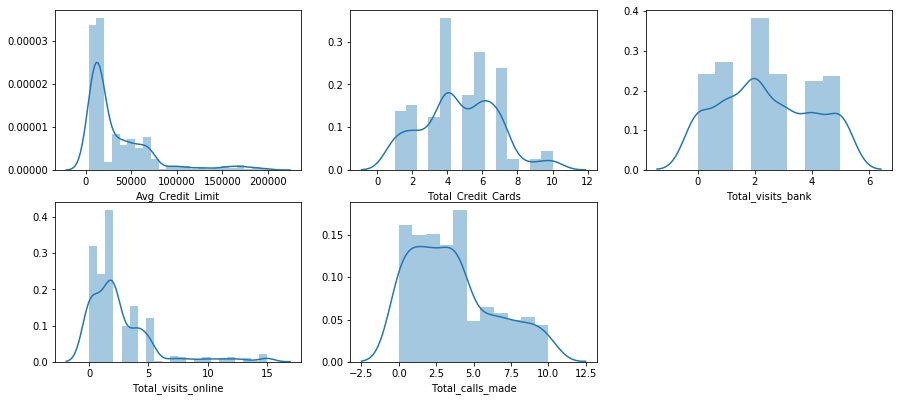

In [6]:
cccDataAttr=ccc_data_df.iloc[:,2:]
cccDataScaled=cccDataAttr.apply(zscore)
#### LEts check distro for each
plt.figure(figsize=(15,10))
pos = 1
for column in cccDataAttr.select_dtypes(include=[np.number]):
    plt.subplot(3, 3, pos)
    dist_plot=sns.distplot(cccDataAttr[column])
    dist_plot.set(xlabel=column)
    pos += 1

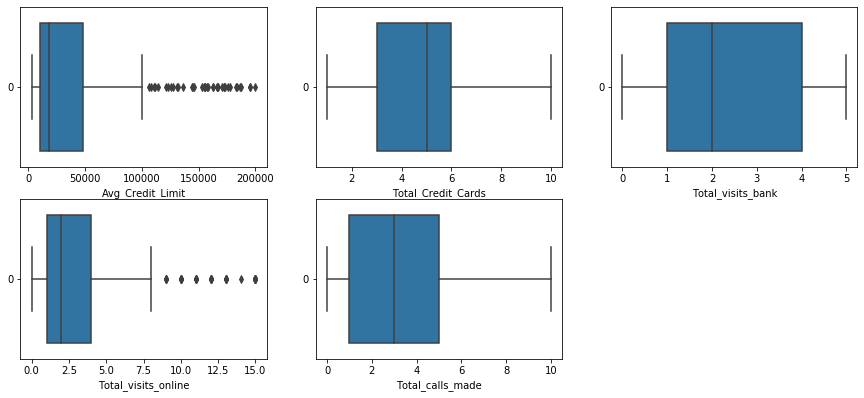

In [7]:
#### LEts plot the box for each
plt.figure(figsize=(15,10))
pos = 1
for column in cccDataAttr.select_dtypes(include=[np.number]):
    plt.subplot(3, 3, pos)
    box_plot = sns.boxplot(data=cccDataAttr[column], orient="h")
    box_plot.set(xlabel=column)
    pos += 1

## Obervation: understand the variables at your disposal and to get an idea about the no of clusters

Based on the univariant analysis # of clusters...
<p>Avg_Credit_Limit -  3 clusters  (3rd cluster has outliers)
<p>Total_Credit_Cards - 5 clusters
<p>Total_visits_bank - 3 clusters
<p>Total_visits_online - 4 clusters (the last cluster has outliers)
<p>Total_calls_made - 2 clusters

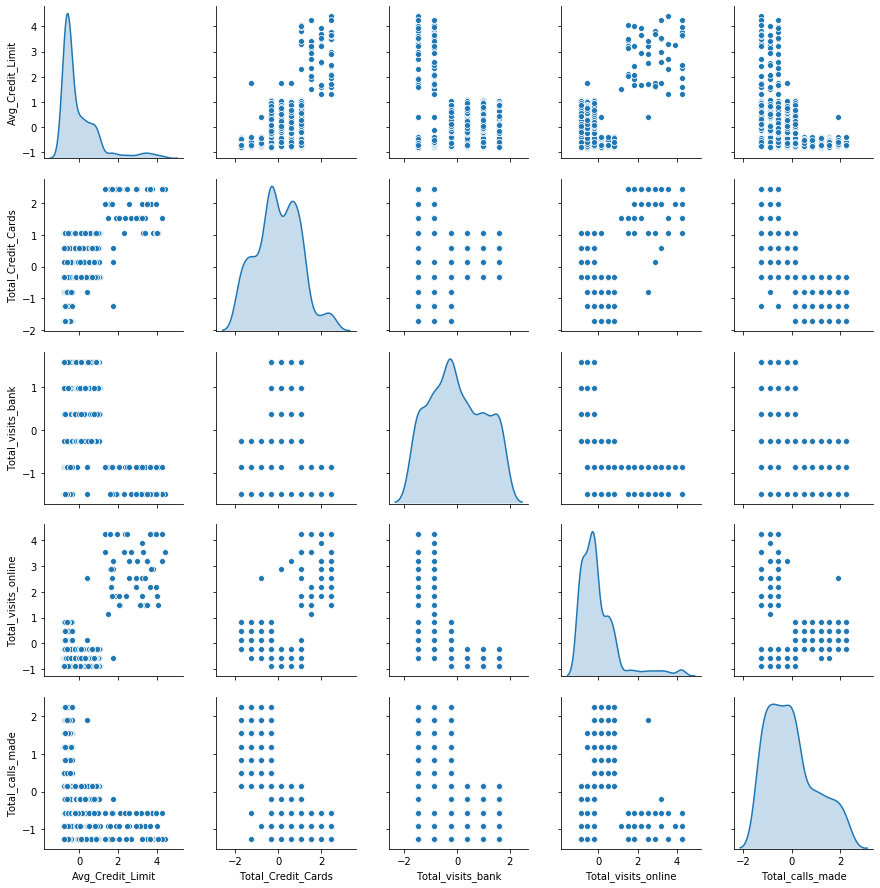

In [8]:
sns.pairplot(cccDataScaled,diag_kind='kde')

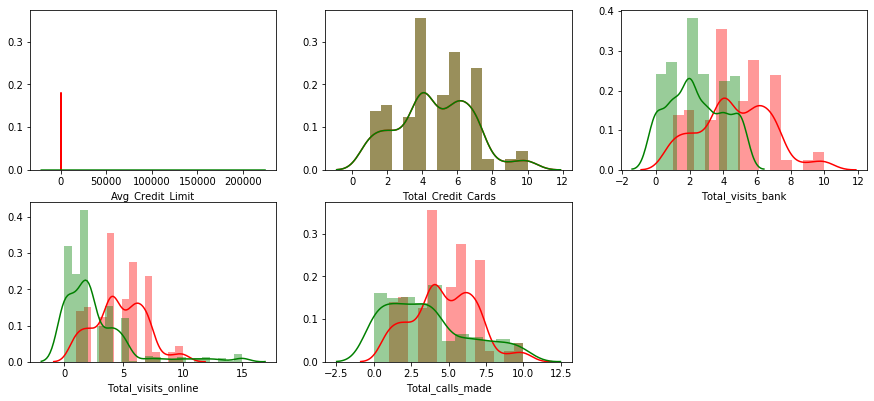

In [9]:
#### LEts check bi-variant for each
plt.figure(figsize=(15,10))
pos = 1
for column in cccDataAttr.select_dtypes(include=[np.number]):
    plt.subplot(3, 3, pos)
    sns.distplot(cccDataAttr['Total_Credit_Cards'],color='r',label='Total_Credit_Cards')
    sns.distplot(cccDataAttr[column],color='g',label=cccDataAttr[column])
    pos += 1

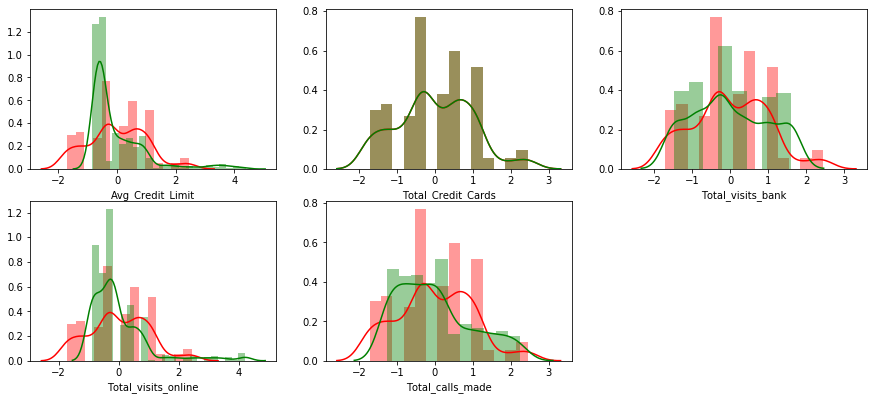

In [10]:
#### LEts check bi-variant for each
plt.figure(figsize=(15,10))
pos = 1
for column in cccDataScaled.select_dtypes(include=[np.number]):
    plt.subplot(3, 3, pos)
    sns.distplot(cccDataScaled['Total_Credit_Cards'],color='r',label='Total_Credit_Cards')
    sns.distplot(cccDataScaled[column],color='g',label=cccDataScaled[column])
    pos += 1

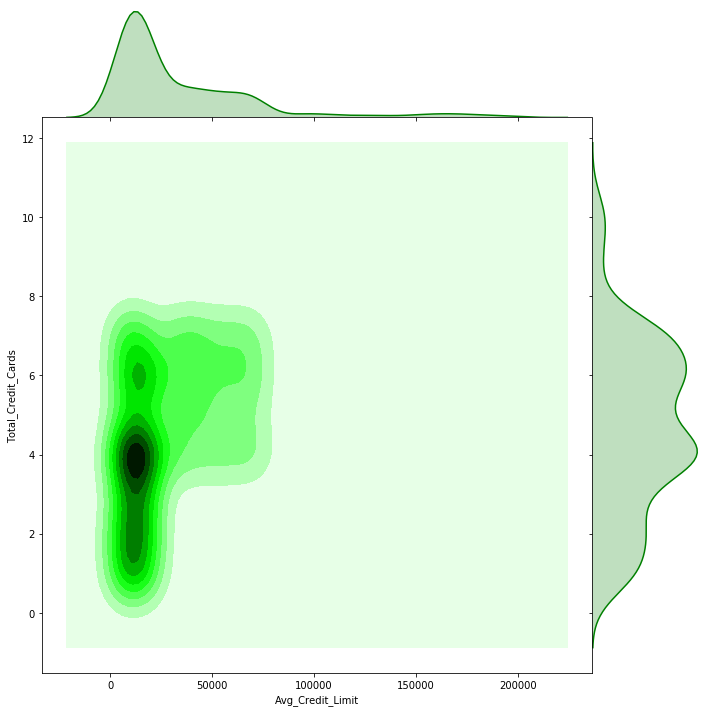

In [11]:
sns.jointplot("Avg_Credit_Limit","Total_Credit_Cards", data=ccc_data_df, kind="kde", space=0, color="g",  height=10)
plt.show()

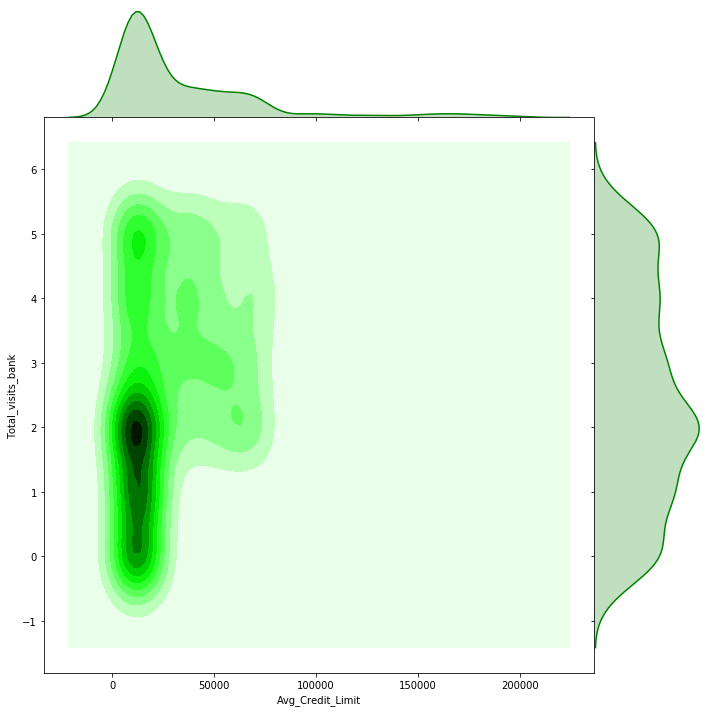

In [12]:
sns.jointplot("Avg_Credit_Limit","Total_visits_bank", data=ccc_data_df, kind="kde", space=0, color="g",  height=10)
plt.show()

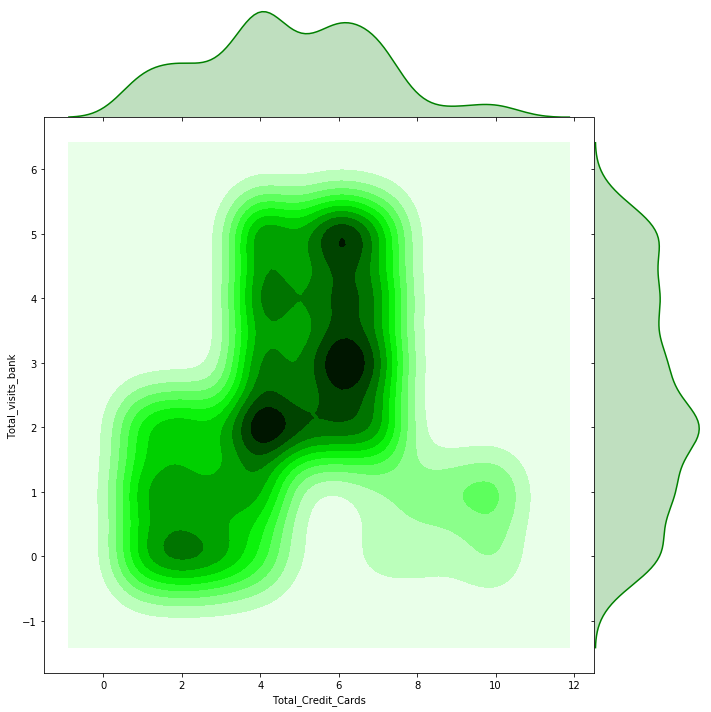

In [13]:
sns.jointplot("Total_Credit_Cards","Total_visits_bank", data=ccc_data_df, kind="kde", space=0, color="g",  height=10)
plt.show()

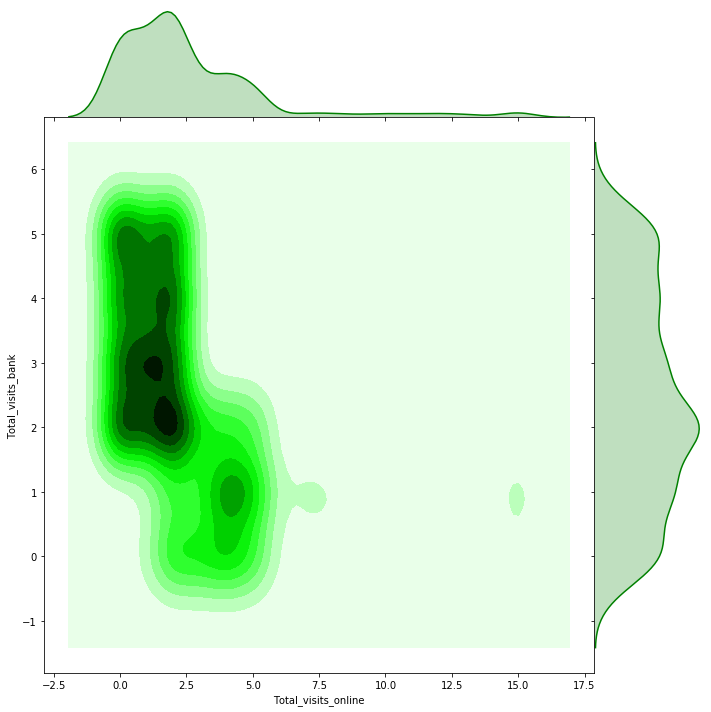

In [14]:
sns.jointplot("Total_visits_online","Total_visits_bank", data=ccc_data_df, kind="kde", space=0, color="g",  height=10)
plt.show()

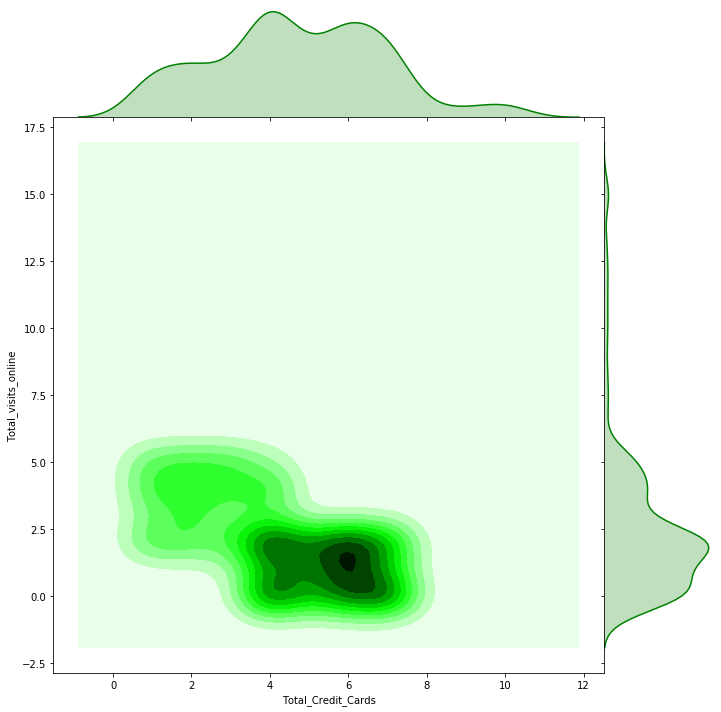

In [15]:
sns.jointplot("Total_Credit_Cards","Total_visits_online", data=ccc_data_df, kind="kde", space=0, color="g",  height=10)
plt.show()

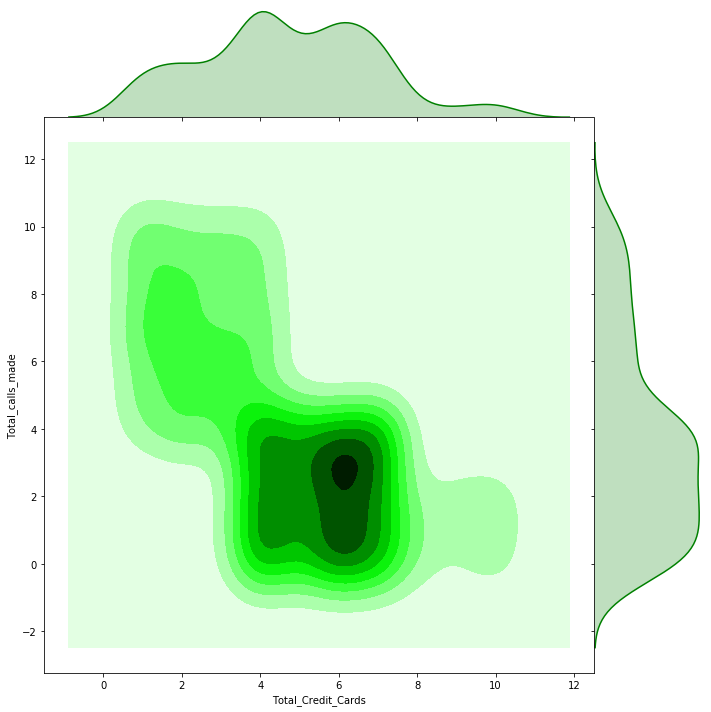

In [16]:
sns.jointplot("Total_Credit_Cards","Total_calls_made", data=ccc_data_df, kind="kde", space=0, color="g",  height=10)
plt.show()

### 2. Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)

## Conclusion from graphs. Compare 2 features

<b> "Avg_Credit_Limit" vs "Total_Credit_Cards" = 2 clusters </b>
<p> cluster1 - (people with lesser # of credit cards have a lower credit limit) # of  obersavtions in cluster1 > cluster 2
<p> cluster2 - (people with higher # of credit cards have a higher credit limit)
    <p><b>"Avg_Credit_Limit" vs "Total_visits_bank" = 2 clusters </b>
<p> cluster1 - (people with lower credit limit have a lower bank visits) # of  obersavtions in cluster1 > cluster 2
<p> cluster2 - (people with higher credit limit have a higher bank visits)


<p><b>"Total_Credit_Cards" vs "Total_visits_bank" = 3 clusters</b>
<p>cluster1 - # of cards 1-3 has lower bank visits.
<p>cluster2 - # of cards 4-7 have higher bank visits.
<p>cluster3 - # of cards 8-10 have lower bank visits.
    <p> # of oberservations in Cluster2 > Cluster1 > Cluster3
<b><p>"Total_visits_online" vs "Total_visits_bank" = 2 clusters</b>
<p> cluster1 - (people with lower online visits had higher bank visits) # of  obersavtions in cluster1 > cluster 2
<p> cluster2 - (people with higher online visits had lower bank visits)
<b><p>"Total_Credit_Cards" vs "Total_visits_online" = 2 clusters</b>
<p> cluster1 - people with upto 4 credit card  had higher online visits. # of  obersavtions in cluster2 > cluster 1
<p> cluster2 - (people with more than 4 credit card  had lower online visits.)

<b><p>"Total_Credit_Cards" vs "Total_calls_made" = 3 clusters</b>
<p>cluster1 - # of cards 0-4 has highest calls made.
<p>cluster2 - # of cards 4-7 have lower calls made.
<p>cluster3 - # of cards 8-10 have lowest calls made.
        <p> # of oberservations in Cluster2 > Cluster1 > Cluster3






### 3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)

## Group Data into similar clusters

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

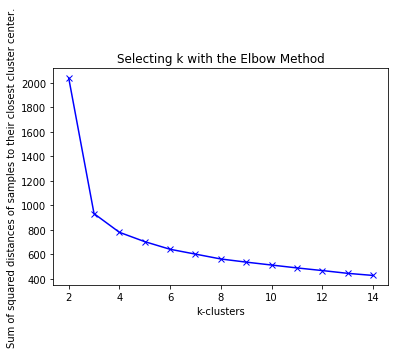

In [17]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
km_clusters=range(2,15)
meanDistortions=[]
kmean_silhouetteScore=[]

for k in km_clusters:
    model = KMeans(n_clusters = k, init="k-means++", random_state=10)
    model.fit(cccDataScaled)
    meanDistortions.append(model.inertia_)
    prediction=model.predict(cccDataScaled)
    kmean_silhouetteScore.append(silhouette_score (cccDataScaled, prediction, metric='euclidean'))
      
plt.plot(km_clusters, meanDistortions, 'bx-')
plt.xlabel('k-clusters')
plt.ylabel('Sum of squared distances of samples to their closest cluster center.')
plt.title('Selecting k with the Elbow Method')


Based on the elbow method looks like 3 clusters is the optimum #number of clusters.
Later on silhouette analysis shows 3 is the optimum #number. 

In [18]:
# Let use Final value of K = 3
final_model=KMeans(3)
final_model.fit(cccDataScaled)
prediction=final_model.predict(cccDataScaled)

#Append the prediction 
ccc_data_df["GROUP"] = prediction
cccDataScaled["GROUP"] = prediction
print("Groups Assigned : added the groups at the end of the dataframes\n")
ccc_data_df.head()

Groups Assigned : added the groups at the end of the dataframes



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1,87073,100000,2,1,1,0,2
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,2
3,4,40496,30000,5,1,1,4,2
4,5,47437,100000,6,0,12,3,0


### Analyze the distribution of the data among the three groups (K = 3). One of the most informative visual tool is boxplot.

In [19]:
cccDataClust = ccc_data_df.groupby(['GROUP'])
cccDataClust.mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,,,
0,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000
1,117.857143,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536
2,417.528497,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000


In [20]:
#ccc_data_df.dtypes
ccc_data_df['GROUP'] = ccc_data_df.GROUP.astype('category')
#ccc_data_df.dtypes

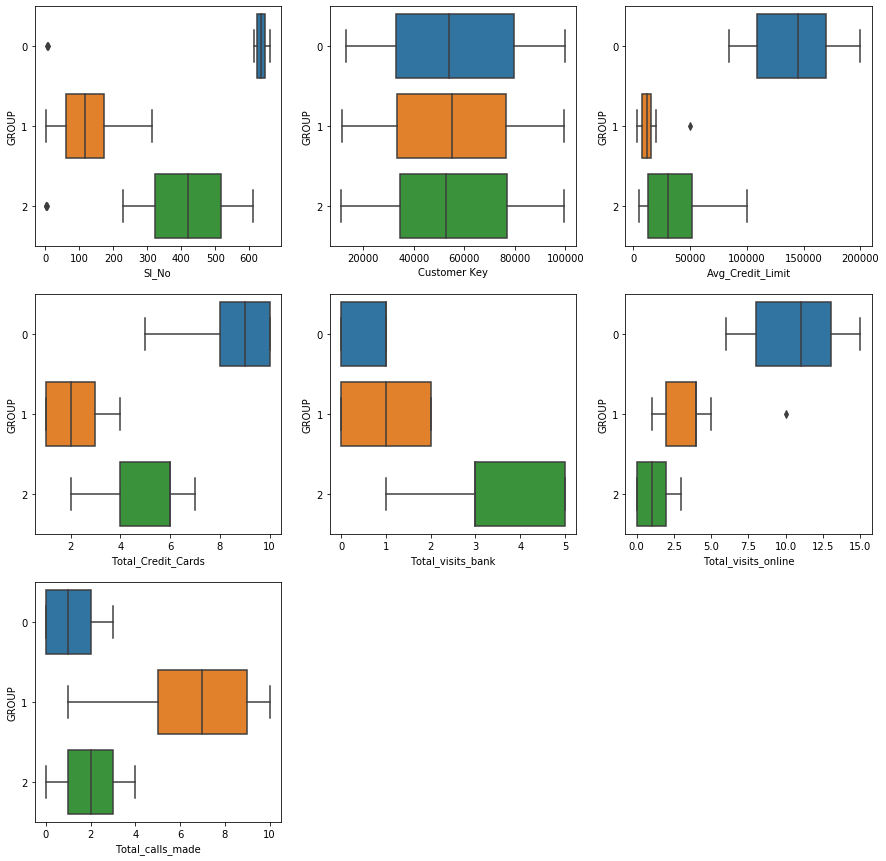

In [21]:
#### LEts plot the box for each
plt.figure(figsize=(15,15))
pos = 1
for column in ccc_data_df.select_dtypes(include=[np.number]):
    plt.subplot(3, 3, pos)
    box_plot = sns.boxplot(x=ccc_data_df[column], y=ccc_data_df['GROUP'], orient="h")
    box_plot.set(xlabel=column)
    pos += 1

## Conclusion from boxplot. 

<p><b> Group0 </b>
<p> Avg_Credit_Limit = under 50K
<p> Total_Credit_Cards = 4-6 cards
<p> Total_visits_bank = 3-5 visits
<p> Total_visits_online = under 2.5
<p> Total_calls_made = 1-3 calls
<p>
    <p><b> Group1 </b>
<p> Avg_Credit_Limit = under 20K
<p> Total_Credit_Cards = under 3 cards
<p> Total_visits_bank = under 2 visits
<p> Total_visits_online = 2.5 - 4
<p> Total_calls_made = 5-9 calls
    
<p><b> Group2 </b>
<p> Avg_Credit_Limit = between 100k-200k
<p> Total_Credit_Cards = 8-10 cards
<p> Total_visits_bank = less than 1 visit
<p> Total_visits_online = 8-13
<p> Total_calls_made = under 2 calls
<p>

In [22]:
# remove the groups feature introduced by K-Means
# this dataset will be re-used for hierarchical clustering
ccc_data_df.drop('GROUP', axis=1, inplace=True)
cccDataScaled.drop('GROUP', axis=1, inplace=True)
ccc_data_df.dtypes
cccDataScaled.dtypes

Avg_Credit_Limit       float64
Total_Credit_Cards     float64
Total_visits_bank      float64
Total_visits_online    float64
Total_calls_made       float64
dtype: object

### 4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)

In [23]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [24]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [25]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z_average = linkage(cccDataScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z_average , pdist(cccDataScaled))

c

0.8977080867389372

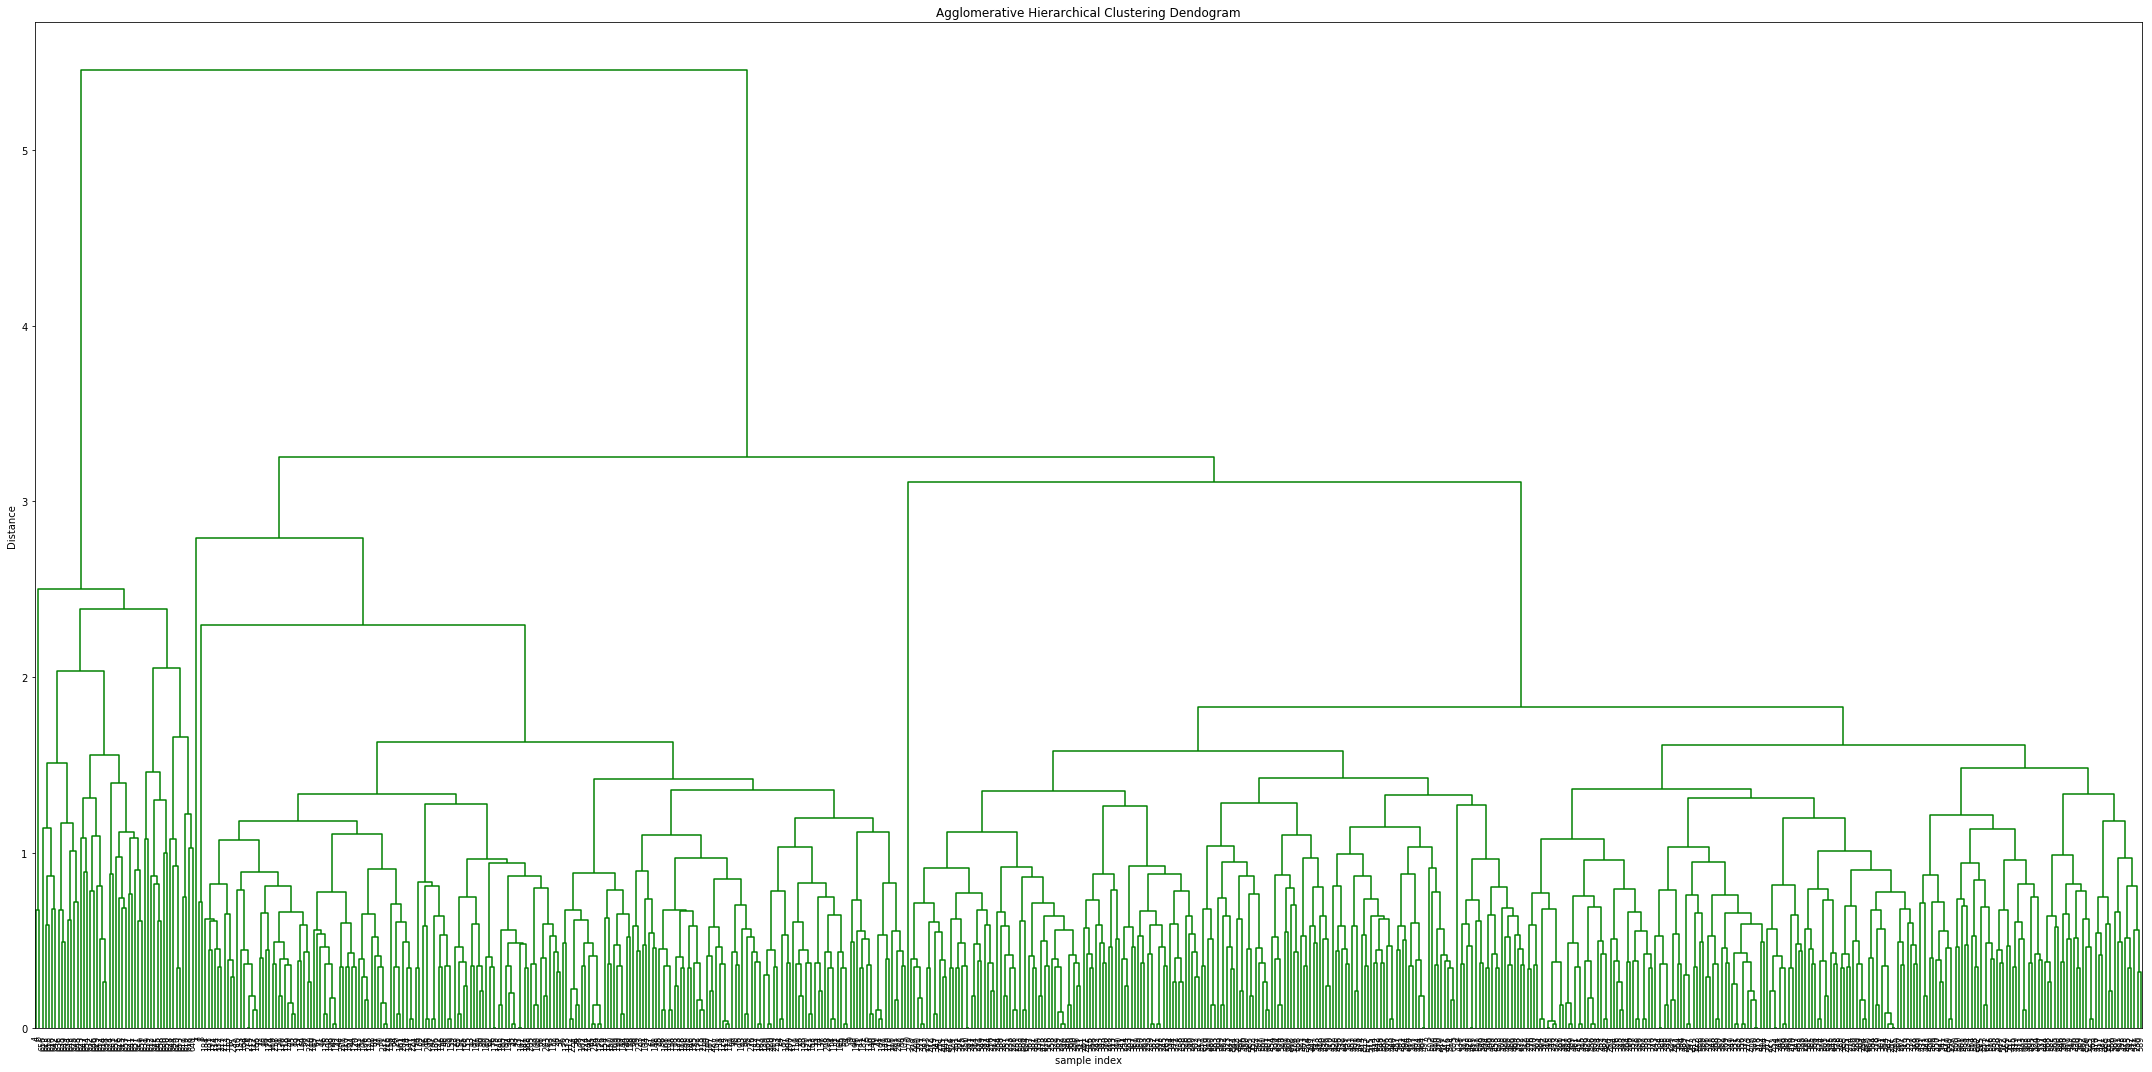

In [26]:
plt.figure(figsize=(30, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_average, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [27]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z_complete = linkage(cccDataScaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z_complete , pdist(cccDataScaled))

c

0.8599730607972423

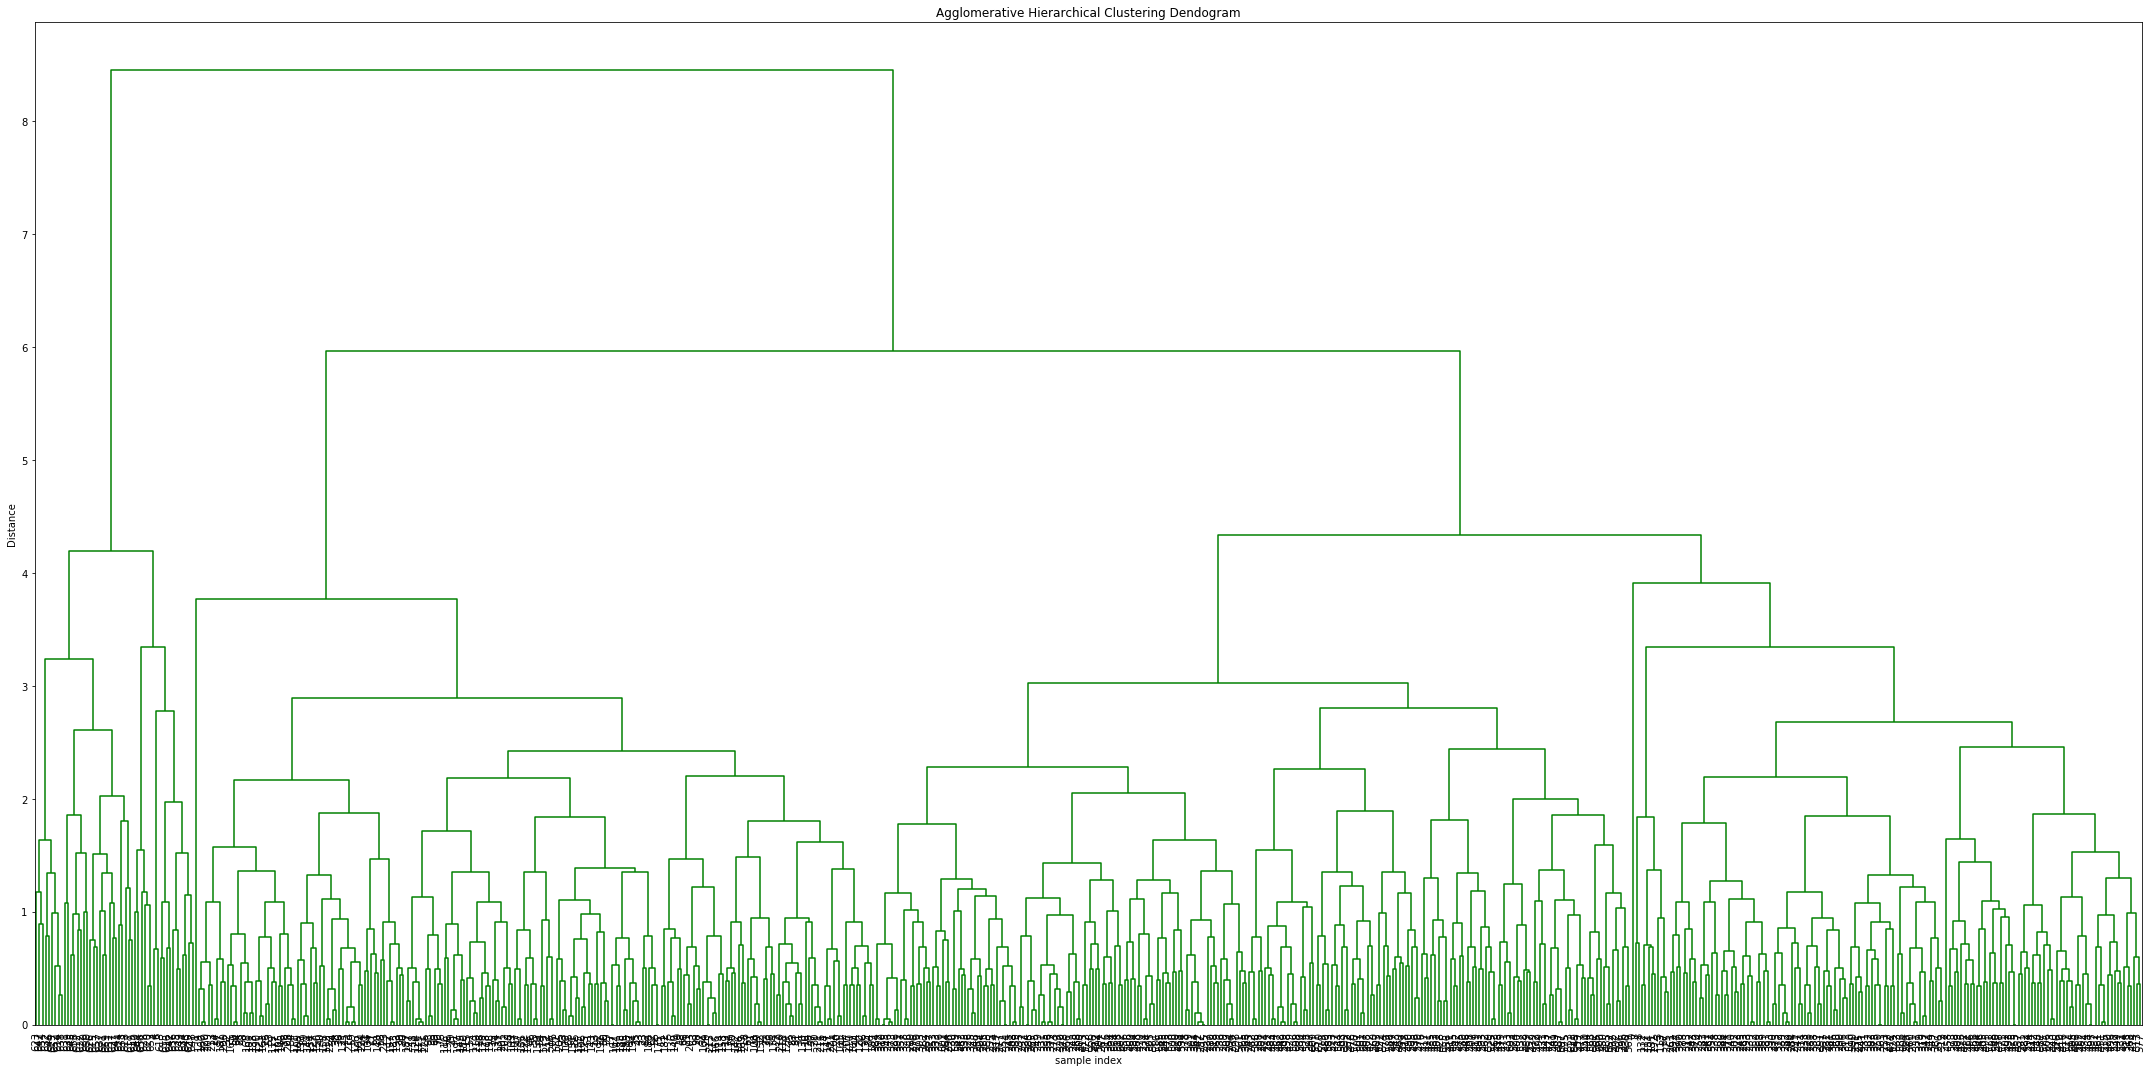

In [28]:
plt.figure(figsize=(30, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_complete, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [29]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z_ward = linkage(cccDataScaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z_ward , pdist(cccDataScaled))

c

0.7415156284827493

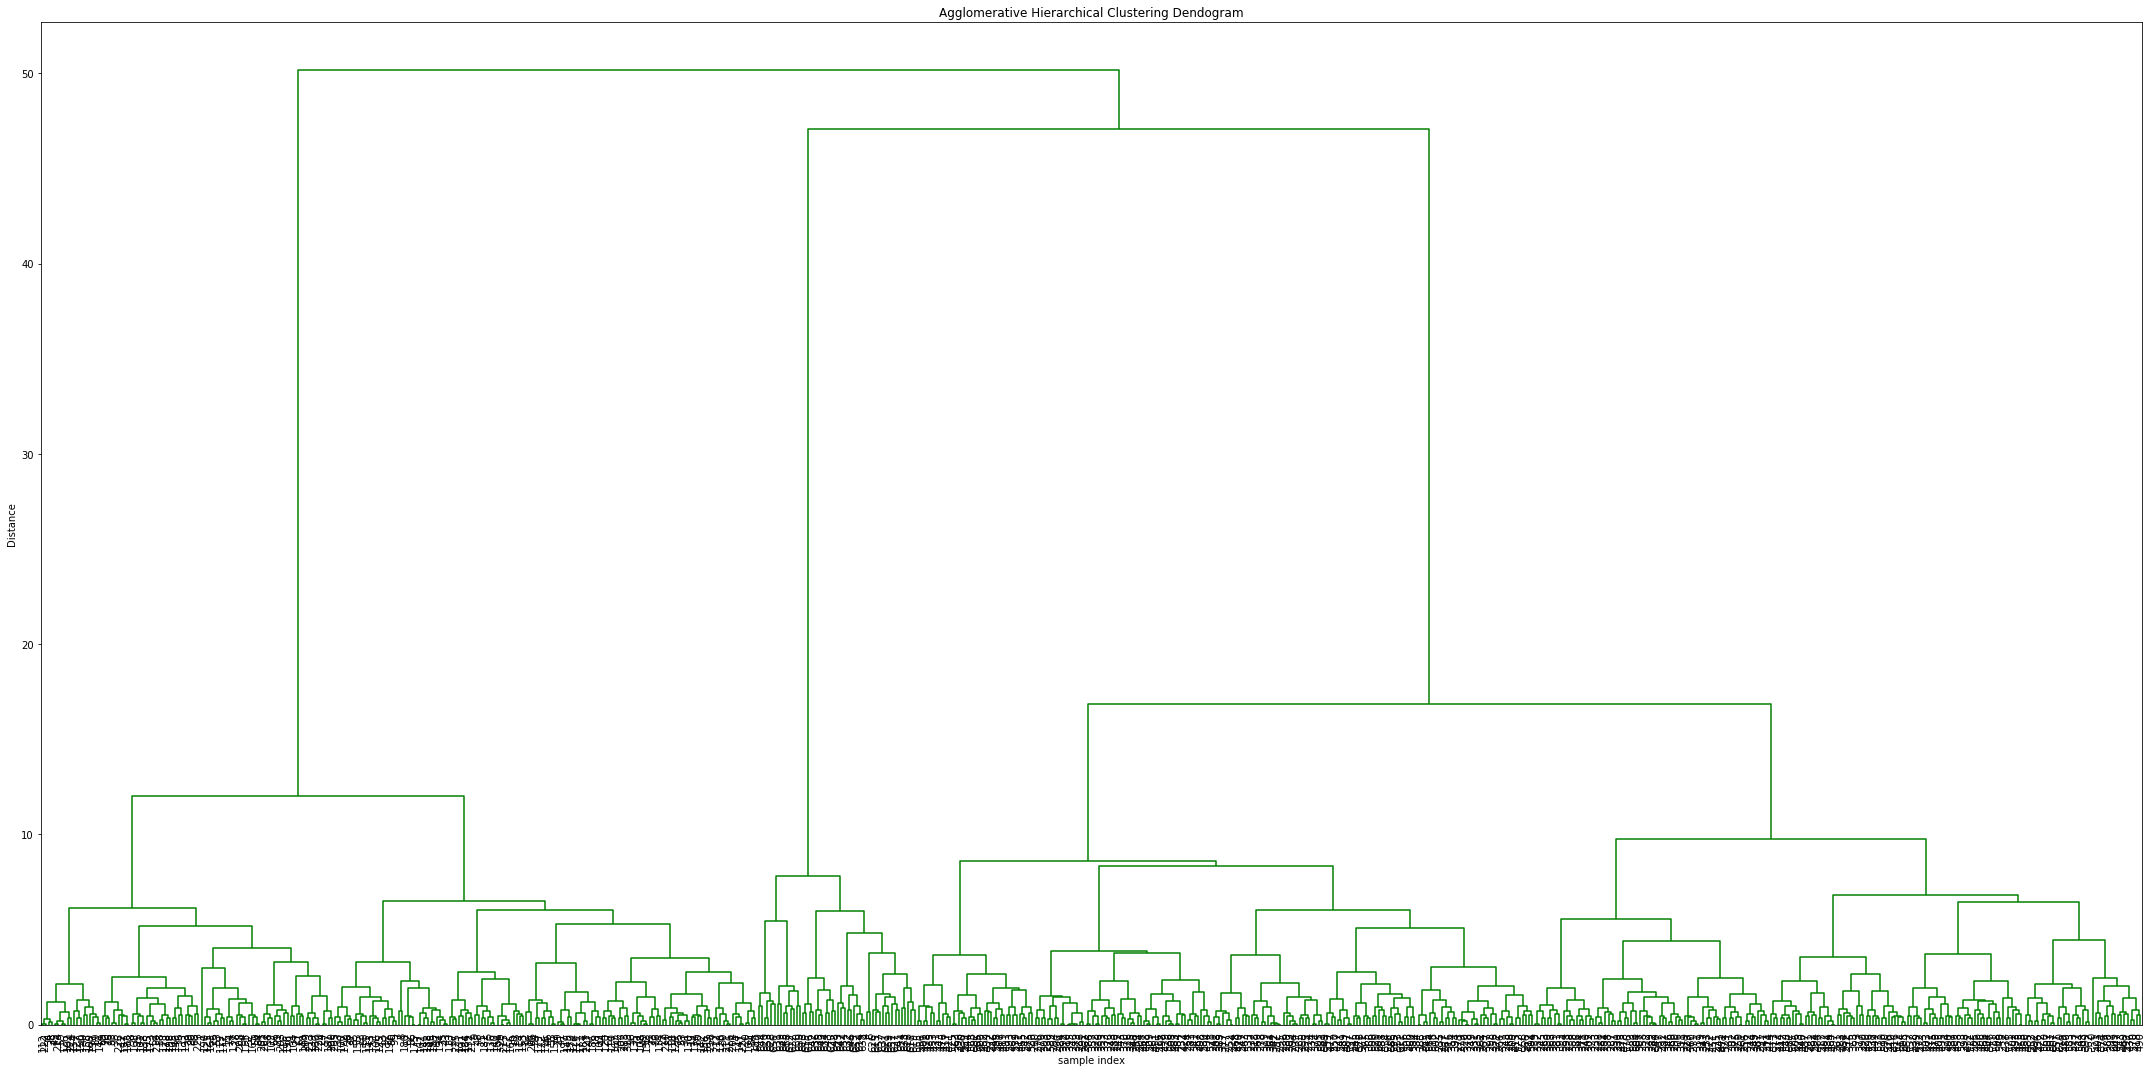

In [30]:
plt.figure(figsize=(30, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_ward, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

### 5. Calculate average silhouette score for both methods. (5 marks)

Number of clusters from 2 to 15: 



Text(0.5, 1.0, 'Maximum Silhouette Score with different k-clusters')

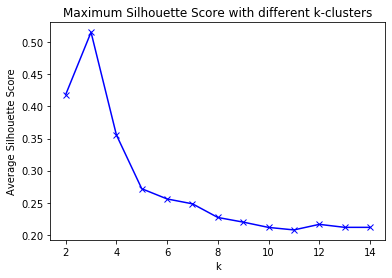

In [31]:
#Use silhouette score
print ("Number of clusters from 2 to 15: \n")

plt.plot(km_clusters, kmean_silhouetteScore, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Silhouette Score')
plt.title('Maximum Silhouette Score with different k-clusters')

In [32]:
print('K-Means silhouette analysis outcome')
print('Max K-Means silhouette score: ')
print('for THREE(3) clustering are the optimum number of K-Means clusters')
kmean_silhouetteScore[1]

K-Means silhouette analysis outcome
Max K-Means silhouette score: 
for THREE(3) clustering are the optimum number of K-Means clusters


0.5157182558881063

### Hierarchical clusters - silhouette score
<b> Linkage Method = Average

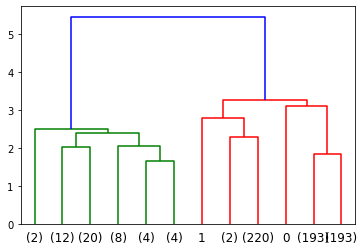

In [33]:
hc_silhouetteScore = []
# Ward
dendrogram(
    Z_average,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
)
plt.show()

In [34]:
clusters = fcluster(Z_average, t=5, criterion='distance')
set(clusters)

{1, 2}

In [35]:
hc_silhouetteScore.append(silhouette_score(cccDataScaled,clusters))
silhouette_score(cccDataScaled,clusters)

0.5703183487340514

In [36]:
# Adding clusters to the dataframe
# this code was added later after comparing the silhouette scores

ccc_data_df["GROUP"] = clusters
print("Groups Assigned : added the groups at the end of the dataframes\n")
ccc_data_df.head(20)

Groups Assigned : added the groups at the end of the dataframes



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1,87073,100000,2,1,1,0,2
1,2,38414,50000,3,0,10,9,2
2,3,17341,50000,7,1,3,4,2
3,4,40496,30000,5,1,1,4,2
4,5,47437,100000,6,0,12,3,1
5,6,58634,20000,3,0,1,8,2
6,7,48370,100000,5,0,11,2,1
7,8,37376,15000,3,0,1,1,2
8,9,82490,5000,2,0,2,2,2
9,10,44770,3000,4,0,1,7,2


### Hierarchical clusters - silhouette score
<b> Linkage Method = complete

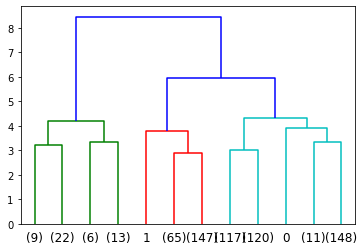

In [37]:
# Ward
dendrogram(
    Z_complete,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
)
plt.show()

In [38]:
clusters = fcluster(Z_complete, t=7, criterion='distance')
set(clusters)

{1, 2}

In [39]:
hc_silhouetteScore.append(silhouette_score(cccDataScaled,clusters))
silhouette_score(cccDataScaled,clusters)

0.5703183487340514

In [40]:
clusters = fcluster(Z_complete, t=5, criterion='distance')
set(clusters)

{1, 2, 3}

In [41]:
hc_silhouetteScore.append(silhouette_score(cccDataScaled,clusters))
silhouette_score(cccDataScaled,clusters)

0.5026435522438492

### Hierarchical clusters - silhouette score
<b> Linkage Method = Ward

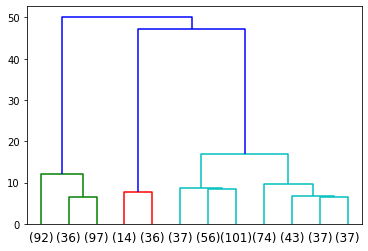

In [42]:
# Ward
dendrogram(
    Z_ward,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
)
plt.show()

In [43]:
clusters = fcluster(Z_ward, t=40, criterion='distance')
set(clusters)

{1, 2, 3}

In [44]:
hc_silhouetteScore.append(silhouette_score(cccDataScaled,clusters))
silhouette_score(cccDataScaled,clusters)

0.5147639589977819

Text(0.5, 1.0, 'Maximum Silhouette Score with different Linkage Method clusters')

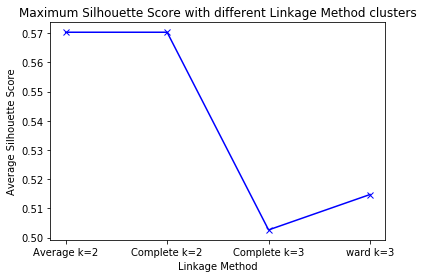

In [45]:
#Use silhouette score
plt.plot(['Average k=2','Complete k=2','Complete k=3','ward k=3'], hc_silhouetteScore, 'bx-')
plt.xlabel('Linkage Method')
plt.ylabel('Average Silhouette Score')
plt.title('Maximum Silhouette Score with different Linkage Method clusters')

### 6. Compare K-means clusters with Hierarchical clusters. (5 marks)

In [46]:
print('K-Means silhouette analysis outcome')
print('Max K-Means silhouette score: ')
print('for THREE(3) clustering are the optimum number of K-Means clusters')
kmean_silhouetteScore[1]

K-Means silhouette analysis outcome
Max K-Means silhouette score: 
for THREE(3) clustering are the optimum number of K-Means clusters


0.5157182558881063

In [47]:
print('Hierarchical silhouette analysis outcome')
print('Max K-Hierarchical clusters silhouette score: ')
print('for TWO(2) clustering - Linkage Method = Average')
hc_silhouetteScore[0]

Hierarchical silhouette analysis outcome
Max K-Hierarchical clusters silhouette score: 
for TWO(2) clustering - Linkage Method = Average


0.5703183487340514

In [48]:
print('Hierarchical silhouette analysis outcome')
print('Max K-Hierarchical clusters silhouette score: ')
print('for TWO(2) clustering - Linkage Method = Complete')
hc_silhouetteScore[1]

Hierarchical silhouette analysis outcome
Max K-Hierarchical clusters silhouette score: 
for TWO(2) clustering - Linkage Method = Complete


0.5703183487340514

### 6. Comparison Results
1. Hierarchical clustering K=2 (Linkage method Average OR Complete) has better results than K-Means K=3



### 7. Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

In [49]:
cccDataClust = ccc_data_df.groupby(['GROUP'])
cccDataClust.mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,,,
1,611.280000,56708.76000,141040.000000,8.74000,0.60000,10.90000,1.080000
2,307.485246,55012.97541,25847.540984,4.37541,2.55082,1.92623,3.788525


In [50]:
#ccc_data_df.dtypes
ccc_data_df['GROUP'] = ccc_data_df.GROUP.astype('category')
#ccc_data_df.dtypes

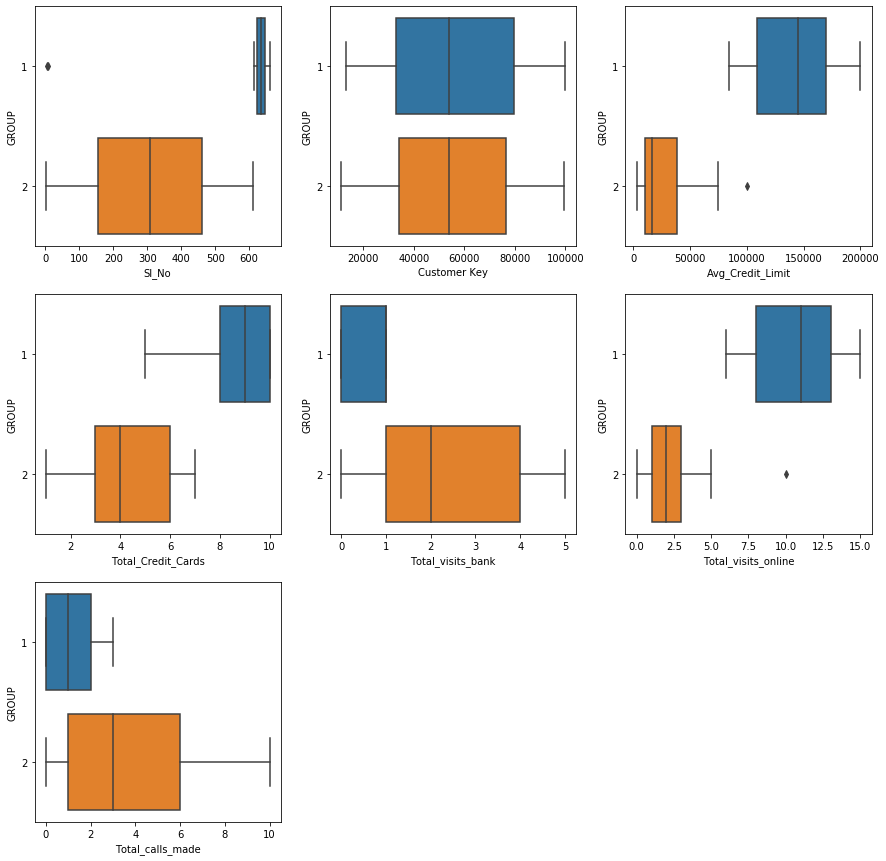

In [51]:
#### LEts plot the box for each
plt.figure(figsize=(15,15))
pos = 1
for column in ccc_data_df.select_dtypes(include=[np.number]):
    plt.subplot(3, 3, pos)
    box_plot = sns.boxplot(x=ccc_data_df[column], y=ccc_data_df['GROUP'], orient="h")
    box_plot.set(xlabel=column)
    pos += 1

### 7. Results
1. How many different segments of customers are there? 
   <p> <b>Answer</b> - There are 2 different customer segments
<p>
2. How are these segments different from each other?
<p><b> Group1 </b>
<p> Avg_Credit_Limit = 100K - 200K
<p> Total_Credit_Cards = 8-10 cards
<p> Total_visits_bank = less than 1 visit
<p> Total_visits_online = 8-13 visits
<p> Total_calls_made = 0-2 calls
<p>
    <p><b> Group2 </b>
<p> Avg_Credit_Limit = under 50K
<p> Total_Credit_Cards = 3-6 cards
<p> Total_visits_bank = 1-4 visits
<p> Total_visits_online = under 3
<p> Total_calls_made = 1-6 calls
<p>

3. What are your recommendations to the bank on how to better market to and service these customers?
<p> <b>Answer</b>
<p>Customers with <b>Lower Avereage Credit limit</b> should be marketed and/or serviced by calling or inside the bank
<p>Customers with <b>Higher Avereage Credit limit</b> should be marketed and/or serviced online